# Homework 1: Statistics
The module for this assignment was taught by Professor Graham McVicker.

**Name:** *your_name_here*

**PID:** *your_PID_here*

## Instructions

Answer the following questions in your own words using a Jupyter notebook and upload a PDF of your code and written answers to Gradescope. Make sure to write your name and PID at the start of your answers. This assignment is due 2/2/23 at 9:00AM.

See this document for instructions on creating a Jupyter notebook:

[https://docs.google.com/document/d/1HP5Q7PARCKluQtfkovnBrupaQZ9oDLxrwxd1asQCtqM](https://docs.google.com/document/d/1HP5Q7PARCKluQtfkovnBrupaQZ9oDLxrwxd1asQCtqM)

***Please use the 16 CPU environment for this assignment. Use the Python [conda env:r-bio] kernel for Part 1 and the R [conda env:r-bio] kernel for Part 2. You can switch the kernel of this notebook by clicking the kernel name in the top right and selecting the new kernel from the drop-down menu.***

## Part 1: CHIP-seq

The following questions refer to these two files:
```
~/public/hw1/hw-f1.bam
~/public/hw1/hw-f2.bam
```

### Problem 1

You received two BAM files from a colleague (hw-f1.bam and hw-f2.bam) but there was a mess up, and the files were not annotated properly. Which UNIX command(s) might you use to investigate which species the data was aligned to? Justify why your command(s) would work. (2 points)

```samtools view -H file.bam | less -S```



**ANSWER:** The header of the files should have information on which genome they were aligned to.


### Problem 2

Find the two BAM files in the hw1 directory and then open the terminal and run your suggested commands from part 1. Which species were the two BAM files aligned to? (1 point)


**ANSWER:** Human (hg19)


### Problem 3

What chromosome does the data in these two files come from? Note, some reads can align to multiple chromosomes, so if you view on IGV or similar make sure to set the data range to 1000 before you zoom to full genome view. (1 points)


**ANSWER:**
chr19

### Problem 4

You were told that the two files are from a ChIP-seq experiment and you are trying to figure out what is in each file: input or ChIP of DNA-binding protein. Which file is the input and which file comes from the ChIP-seq of the DNA-binding protein? What is the target protein/histone modification? Explain the steps you took to reach this decision. Hint: use two consecutive steps of the eleven in the ChIP-seq module. (3 points)


**ANSWER:**

1. Make tag directories for both files

In [4]:
%%bash

# the students don’t need to include this code in their answer
# but the TAs can use this code in future years if they ever need to change this question
mkdir -p tagdirs
for f in ~/public/hw1/hw-f*.bam; do 
    fname="$(basename $f .bam)"
    nohup makeTagDirectory tagdirs/"$fname" -genome ~/public/chipseq/mm9 \
    -checkGC "$f" 2> tagdirs/out."$fname" &
done

2. Make bedgraph file and view in IGV browser


In [6]:
%%bash
# the students don’t need to include this code in their answer
# but the TAs can use this code in future years if they ever need to change this question
mkdir -p viewer
for dir in tagdirs/hw-f*; do
    dirname="$(basename $dir)"
    nohup makeUCSCfile $dir -o viewer/$dirname.ucsc.bedGraph \
    2> viewer/$dirname.out &
done



**ANSWER:**

H3K4me3 should be on promoter and sharp while input should be flat
IGV shots:Genome view -. Reference Google drive for screenshots. 


## Part 2: Statistics

**Reminder to switch you env to R [conda env:r-bio] kernel for Part 2.**

Flora colossus is a plant-like organism native to the planet X. This species is capable of human speech but their vocabulary consists solely of three words: "I", "am", and their name. It is thought that F. colossus can communicate a vast array of complex thoughts and expressions through the pitch and intonation of these three words, but an exact translation has not yet been thoroughly explored.

In an attempt at decoding these rules, scientists asked an F. colossus named Groot to translate a set of 50 words carrying either a negative (neg) or positive (pos) connotation (con). They recorded the responses to each word, and extracted the highest pitch from each response. Their data appears in the file colossus_pitch.csv

In [1]:
neg = as.integer(rnorm(22, mean=200.99, sd=3.18))
pos = as.integer(rnorm(28, mean=210.81, sd=20.67))

In [2]:
data = data.frame(conn=c(rep('neg', 22), rep('pos', 28)), pitch=c(neg, pos))
# write.csv(data, 'colossus_pitch.csv', row.names=F)

In [3]:
# let's load the data into a variable named "data"
data = read.csv("colossus_pitch.csv")
head(data)

,conn,pitch
,<fct>,<int>
1,neg,198
2,neg,199
3,neg,202
4,neg,206
5,neg,195
6,neg,199


### Problem 5

Plot two histograms for the pitches in response to 1) the negative words and 2) the positive words. Please label your axes. Based on the plots, do you think there is a significant difference between the two variables? Justify your reasoning. (2 points)

**ANSWER:**

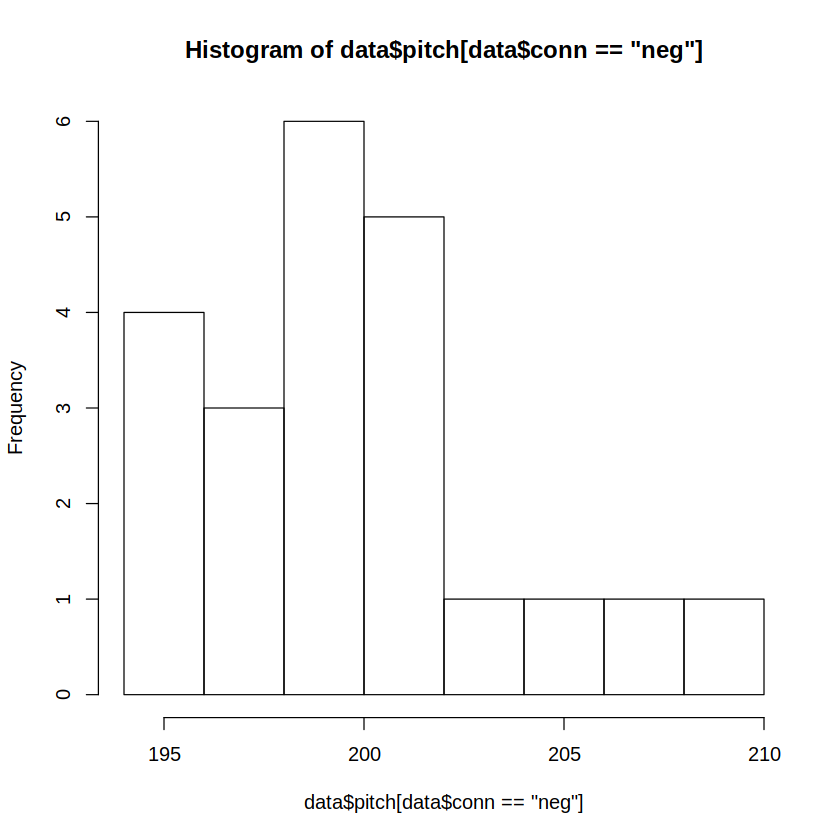

In [13]:
hist(data$pitch[data$conn == 'neg'])

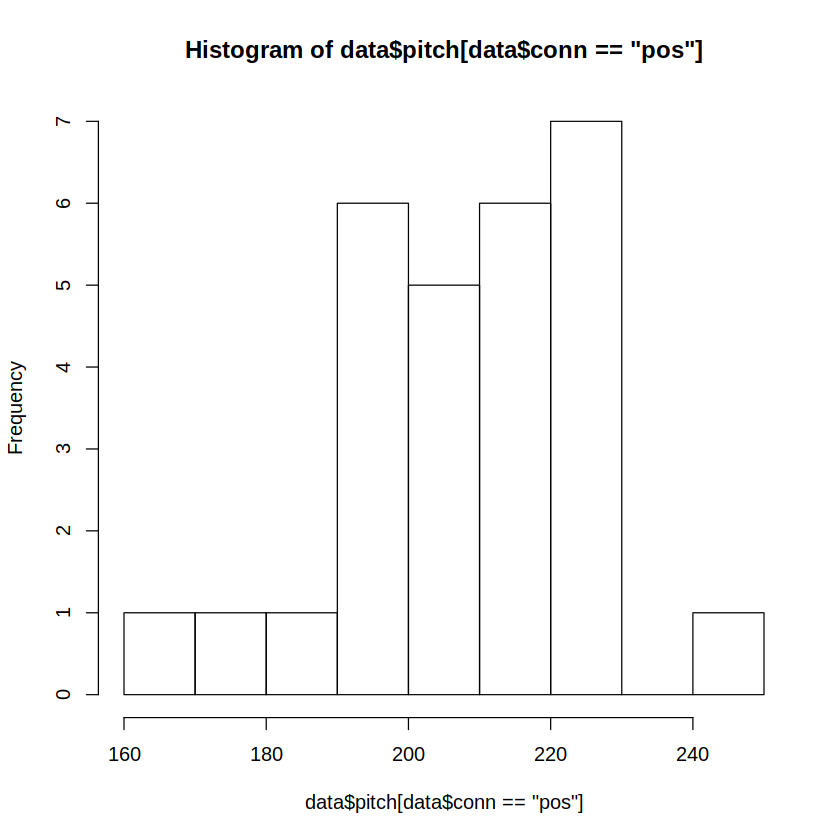

In [14]:
hist(data$pitch[data$conn == 'pos'])

### Problem 6

Report the mean and standard deviation of the pitches for:
1) the negative words 
2) the positive words.(2 points)

**ANSWER:**

In [15]:
mu_neg = mean(data$pitch[data$conn=='neg'])
mu_pos = mean(data$pitch[data$conn=='pos'])
sd_neg = sd(data$pitch[data$conn=='neg'])
sd_pos = sd(data$pitch[data$conn=='pos'])
n_neg = sum(data$conn=='neg')
n_pos = sum(data$conn=='pos')
print(c(mu_neg, mu_pos, sd_neg, sd_pos))

[1] 200.227273 208.071429   3.890548  17.303240


### Problem 7

The scientists think that _F. colossus_ will respond with a lower pitch to words carrying a negative connotation and a higher pitch to words carrying a positive connotation.

Use your results from the previous question to calculate a z-score for this hypothesis. (1 point)

**ANSWER:**

In [19]:
z = (mu_neg - mu_pos) / sqrt((sd_neg**2)/n_neg + (sd_pos**2)/n_pos)
z

[1] -2.325182

### Problem 8

Perform a two-sided z-test and compute the p-value using the `pnorm()` function. Use the results of the prior question as your test statistic. (1 point)

**ANSWER:**

In [20]:
p.val = pnorm(z)*2
p.val

[1] 0.02006223

### Problem 9

Under the threshold $\alpha=0.05$, is this a significant result? Was the scientists' hypothesis correct? (1 point)

**ANSWER:**

YES

### Problem 10

Let's say that we decide to use a t-test instead of a z-test. What kind of distribution are we assuming that the sample means (of the pitches) follow now? Are we now more or less likely to reject the null hypothesis? For full credit, please justify your response.(3 points)

**ANSWER:**

We are assuming that the data follow a Student's t-distribution. Use of the t-test slightly increases the chance that we will reject the null hypothesis because the t-distribution is wider.
